In [312]:
import numpy as np
import pandas as pd

In [313]:
df = pd.read_csv('tit.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [314]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [315]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [316]:
df.drop(columns=['Cabin'],inplace=True)

In [317]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [318]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [319]:
df.drop(columns=['Name','Ticket'],inplace=True)

In [320]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [321]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [322]:
df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C


In [323]:
df = pd.get_dummies(df,columns=['Embarked'],drop_first=True).astype(int)

In [324]:
df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,1,22,1,0,7,0,1
1,2,1,1,0,38,1,0,71,0,0


In [325]:
df['Age'].unique()

array([22, 38, 26, 35, 28, 54,  2, 27, 14,  4, 58, 20, 39, 55, 31, 34, 15,
        8, 19, 40, 66, 42, 21, 18,  3,  7, 49, 29, 65,  5, 11, 45, 17, 32,
       16, 25,  0, 30, 33, 23, 24, 46, 59, 71, 37, 47, 70, 12,  9, 36, 51,
       44,  1, 61, 56, 50, 62, 41, 52, 63, 43, 60, 10, 64, 13, 48, 53, 57,
       80,  6, 74])

In [326]:
res = (df['Age'] == 0).sum()

print("No of zero in this data : ",res)

No of zero in this data :  7


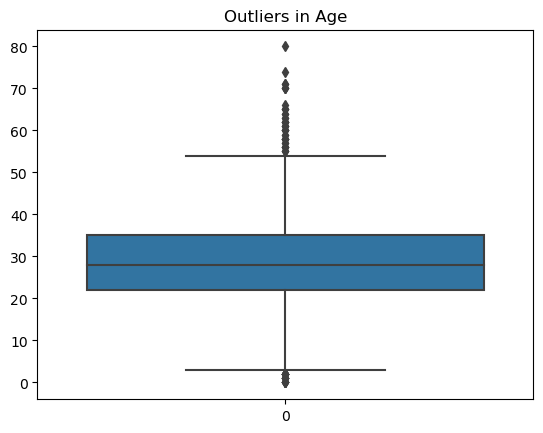

In [327]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(df['Age'])
plt.title("Outliers in Age")
plt.show()

C:\Users\shahe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


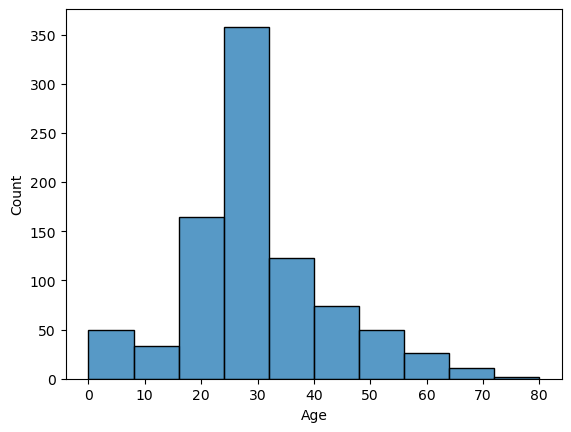

In [328]:
sns.histplot(df['Age'],bins=10)
plt.show()

In [329]:
Q1 = df['Age'].quantile(0.25)
Q3 = df["Age"].quantile(0.75)

IQR = Q3 - Q1 

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (df['Age']>upper_bound)| (df['Age']< lower_bound)
print("Outliers using IQR : ",outliers.sum())

Outliers using IQR :  66


In [330]:
from scipy.stats import zscore
z = zscore(df['Age'])
threshold = 3
out =  (z > threshold) | (z < -threshold)

print("Outliers using Z-score : ",out.sum())

Outliers using Z-score :  7


In [331]:
# iqr 
df_without_out = df[(df['Age'] <= upper_bound) & (df['Age'] >= lower_bound)]

In [332]:
print(df.shape[0])
print(df_without_out.shape[0])

891
825


In [333]:
## caping 

df['Age'] = df['Age'].clip(lower=lower_bound,upper=upper_bound)

In [334]:
Q1 = df['Age'].quantile(0.25)
Q3 = df["Age"].quantile(0.75)

IQR = Q3 - Q1 

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (df['Age']>upper_bound)| (df['Age']< lower_bound)
print("Outliers using IQR : ",outliers.sum())

Outliers using IQR :  0


In [335]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7,0,1
1,2,1,1,0,38.0,1,0,71,0,0
2,3,1,3,0,26.0,0,0,7,0,1
3,4,1,1,0,35.0,1,0,53,0,1
4,5,0,3,1,35.0,0,0,8,0,1


In [336]:
df.drop(columns=['PassengerId'],inplace=True)

In [337]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7,0,1
1,1,1,0,38.0,1,0,71,0,0
2,1,3,0,26.0,0,0,7,0,1
3,1,1,0,35.0,1,0,53,0,1
4,0,3,1,35.0,0,0,8,0,1


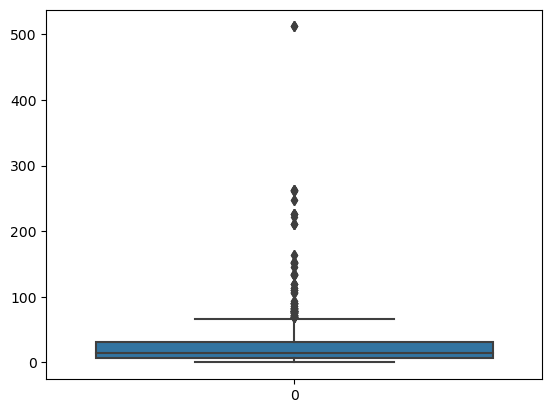

In [338]:
sns.boxplot(df['Fare'])
plt.show()

C:\Users\shahe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


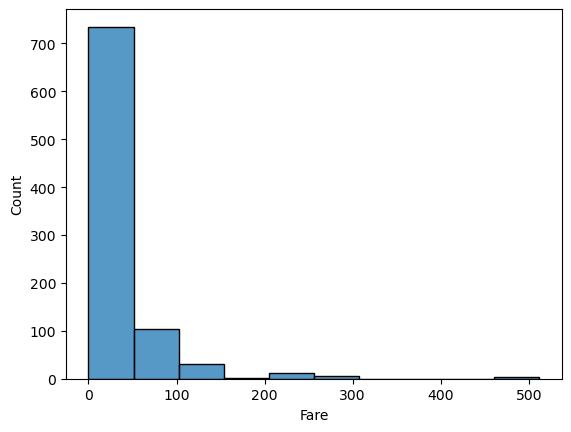

In [339]:
sns.histplot(df['Fare'],bins=10)
plt.show()

In [340]:
from sklearn.preprocessing import MinMaxScaler

mn = MinMaxScaler()

df['Fare'] = mn.fit_transform(df[['Fare']])

In [341]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,0.013672,0,1
1,1,1,0,38.0,1,0,0.138672,0,0
2,1,3,0,26.0,0,0,0.013672,0,1
3,1,1,0,35.0,1,0,0.103516,0,1
4,0,3,1,35.0,0,0,0.015625,0,1


In [342]:
from sklearn.preprocessing import KBinsDiscretizer 

KB = KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='uniform',subsample=None)

df['Age_bins'] = KB.fit_transform(df[['Age']])


In [343]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Age_bins
0,0,3,1,22.0,1,0,0.013672,0,1,1.0
1,1,1,0,38.0,1,0,0.138672,0,0,3.0
2,1,3,0,26.0,0,0,0.013672,0,1,2.0
3,1,1,0,35.0,1,0,0.103516,0,1,3.0
4,0,3,1,35.0,0,0,0.015625,0,1,3.0


#### another method is 

In [344]:
bins = [0,20,45,80,100]
labels = ['a','b','c','d']

df['Age_group'] = pd.cut(df['Age'],bins=bins,labels=labels)

In [345]:
df.head(8)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Age_bins,Age_group
0,0,3,1,22.0,1,0,0.013672,0,1,1.0,b
1,1,1,0,38.0,1,0,0.138672,0,0,3.0,b
2,1,3,0,26.0,0,0,0.013672,0,1,2.0,b
3,1,1,0,35.0,1,0,0.103516,0,1,3.0,b
4,0,3,1,35.0,0,0,0.015625,0,1,3.0,b
5,0,3,1,28.0,0,0,0.015625,1,0,2.0,b
6,0,1,1,54.0,0,0,0.099609,0,1,4.0,c
7,0,3,1,2.5,3,1,0.041016,0,1,0.0,a


In [346]:
df_one_hot = pd.get_dummies(df,columns=['Age_group'],drop_first=True).astype(int)

df_one_hot.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Age_bins,Age_group_b,Age_group_c,Age_group_d
0,0,3,1,22,1,0,0,0,1,1,1,0,0
1,1,1,0,38,1,0,0,0,0,3,1,0,0
2,1,3,0,26,0,0,0,0,1,2,1,0,0
3,1,1,0,35,1,0,0,0,1,3,1,0,0
4,0,3,1,35,0,0,0,0,1,3,1,0,0


In [347]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Age_bins,Age_group
0,0,3,1,22.0,1,0,0.013672,0,1,1.0,b
1,1,1,0,38.0,1,0,0.138672,0,0,3.0,b
2,1,3,0,26.0,0,0,0.013672,0,1,2.0,b
3,1,1,0,35.0,1,0,0.103516,0,1,3.0,b
4,0,3,1,35.0,0,0,0.015625,0,1,3.0,b


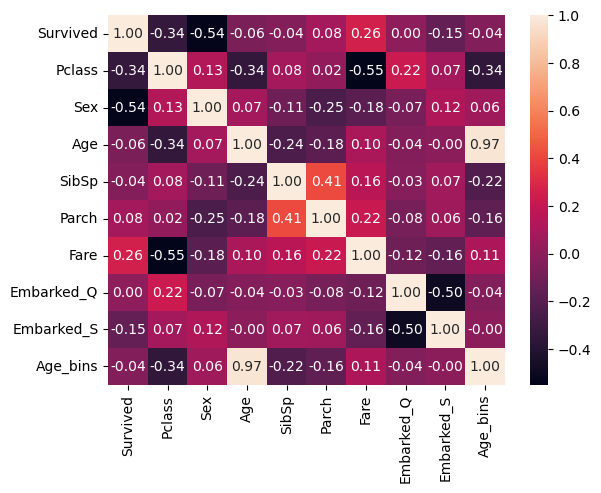

In [351]:
n_data = df.drop(columns=['Age_group'])

c = n_data.corr()
sns.heatmap(c,annot=True,fmt='.2f')
plt.show()

In [365]:
from sklearn.feature_selection import VarianceThreshold                          # Varience Threshold

sel = VarianceThreshold(threshold=0.3)
x_selected = sel.fit_transform(n_data)


names = n_data.columns[sel.get_support()]
print(names)


Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Age_bins'], dtype='object')


In [366]:
from sklearn.model_selection import train_test_split

X = n_data.drop(columns=['Survived'])
y = n_data['Survived']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [367]:
from sklearn.feature_selection import SelectKBest,chi2                           # Chi-Square Test

chi = SelectKBest(chi2,k=4)

x_sel = chi.fit_transform(X_train,y_train)

names_chi = X_train.columns[chi.get_support()]

print(names_chi)

Index(['Pclass', 'Sex', 'Age', 'Fare'], dtype='object')


In [368]:
from sklearn.feature_selection import RFE                                       # RFE
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression(max_iter=200)

sele = RFE(model,n_features_to_select=4)

x_sele = sele.fit_transform(X_train,y_train)

names_rfe = X_train.columns[sele.support_]


print(names_rfe)

Index(['Pclass', 'Sex', 'Embarked_S', 'Age_bins'], dtype='object')


In [369]:
## Model Building 

In [378]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train,y_train)

GaussianNB()

In [379]:
y_pred = model.predict(X_test)

In [380]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0])

In [381]:
from sklearn.metrics import accuracy_score

print("Accuracy score : ",accuracy_score(y_test,y_pred))

Accuracy score :  0.7802690582959642


In [387]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [388]:
y_pred = model.predict(X_test)

In [389]:
from sklearn.metrics import accuracy_score

print("Accuracy score : ",accuracy_score(y_test,y_pred))

Accuracy score :  0.7937219730941704
